In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from sklearn.model_selection import train_test_split
# for visual
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# accuracy stuf
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Des tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# SVM
from sklearn.svm import SVC
#gridsearch for 3-5 tasks
from sklearn.model_selection import GridSearchCV
# random forest
from sklearn.ensemble import RandomForestClassifier
# ada boost
from sklearn.ensemble import AdaBoostClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oranges-vs-grapefruit/citrus.csv


In [2]:
data = pd.read_csv('/kaggle/input/oranges-vs-grapefruit/citrus.csv')
data.head(10)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [3]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


<AxesSubplot:>

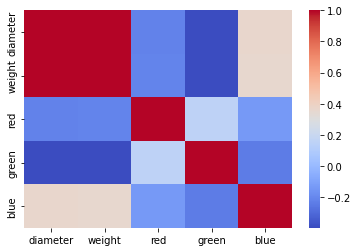

In [5]:
sns.heatmap(data.corr(),cmap='coolwarm')

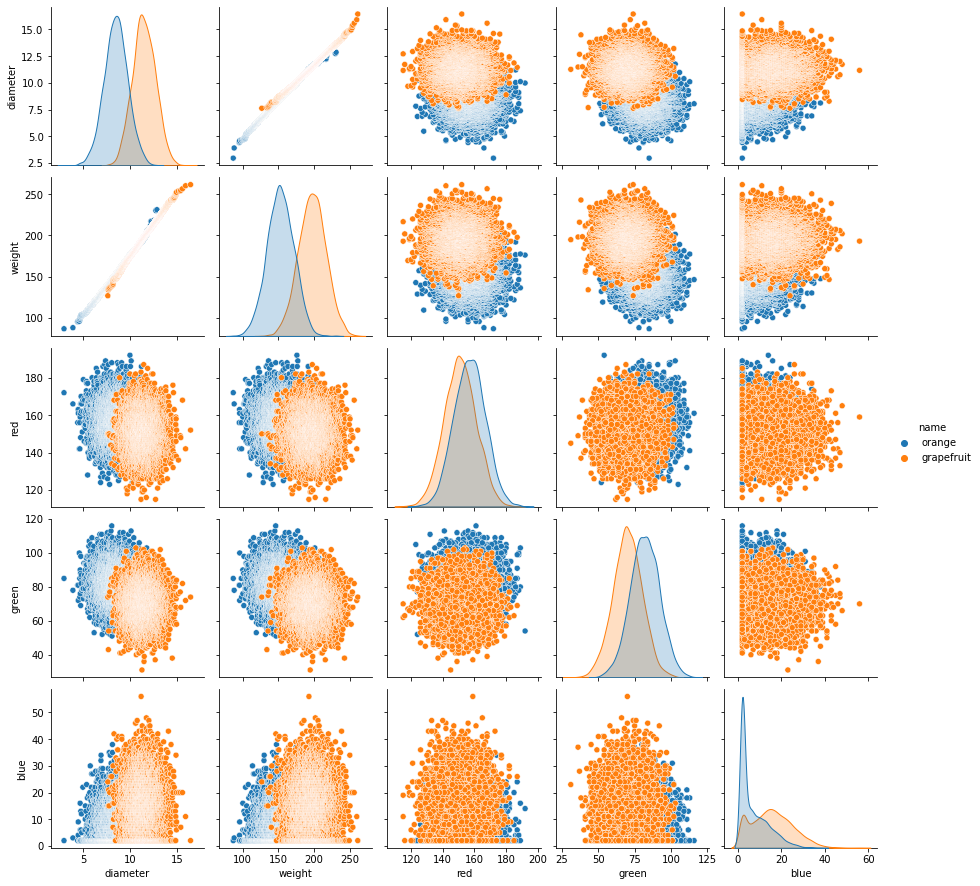

In [6]:
%matplotlib inline
sns.pairplot(data,hue='name')

In [7]:
X = data.drop(['name'], axis = 1)
y = data['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

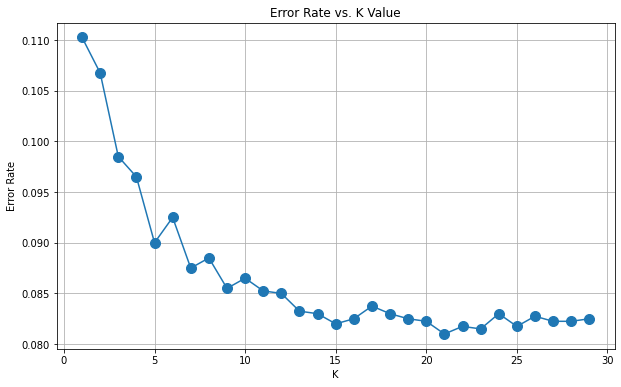

In [9]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [10]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[1833  177]
 [ 151 1839]]

              precision    recall  f1-score   support

  grapefruit       0.92      0.91      0.92      2010
      orange       0.91      0.92      0.92      1990

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



In [11]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(scaled_X_train, y_train)
y_pred = tree.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.93      0.93      0.93      2010
      orange       0.92      0.93      0.93      1990

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



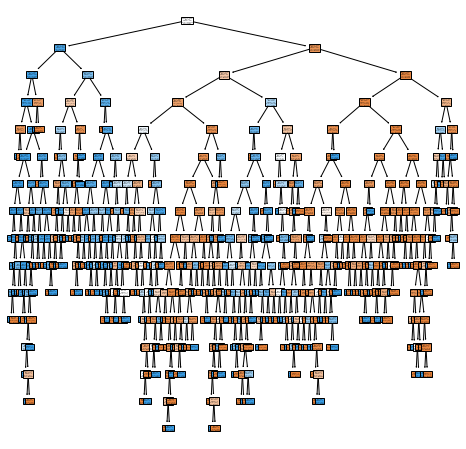

In [12]:
plt.figure(figsize = (8, 8))
plot_tree(tree, feature_names = ['diameter', 'weight', 'red', 'green', 'blue'], 
          class_names = ['grapefruit', 'orange'], filled = True)
plt.show()

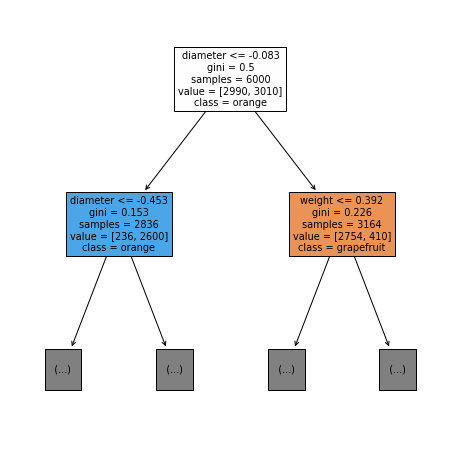

In [13]:
plt.figure(figsize = (8, 8))
plot_tree(tree, max_depth = 1, feature_names = ['diameter', 'weight', 'red', 'green', 'blue'], 
          class_names = ['grapefruit', 'orange'], filled = True)
plt.show()

In [14]:
SVM_model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
SVM_model.fit(scaled_X_train,y_train)
y_pred = SVM_model.predict(scaled_X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[1854  156]
 [ 161 1829]]

              precision    recall  f1-score   support

  grapefruit       0.92      0.92      0.92      2010
      orange       0.92      0.92      0.92      1990

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [16]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[1983   27]
 [ 114 1876]]

              precision    recall  f1-score   support

  grapefruit       0.95      0.99      0.97      2010
      orange       0.99      0.94      0.96      1990

    accuracy                           0.96      4000
   macro avg       0.97      0.96      0.96      4000
weighted avg       0.97      0.96      0.96      4000



In [17]:
rfc = RandomForestClassifier()
rfc.fit(scaled_X_train,y_train)
predictions = rfc.predict(scaled_X_test)
print(classification_report(y_test,predictions))

print('conf matrix:\n',confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

  grapefruit       0.93      0.95      0.94      2010
      orange       0.94      0.93      0.94      1990

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

conf matrix:
 [[1901  109]
 [ 133 1857]]


In [18]:
param_grid2 = {'max_depth': [10, 20, 30, 40],
 'min_samples_leaf': [1, 2, 4, 7],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 600]}
grid2 = GridSearchCV(RandomForestClassifier(), param_grid2, refit=True)
grid2.fit(scaled_X_train,y_train)
print(grid2.best_params_)
print(grid2.best_estimator_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400)


In [19]:
grid_predictions2 = grid2.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions2))
print()
print(classification_report(y_test,grid_predictions2))

[[1896  114]
 [ 128 1862]]

              precision    recall  f1-score   support

  grapefruit       0.94      0.94      0.94      2010
      orange       0.94      0.94      0.94      1990

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [20]:
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaclf.fit(scaled_X_train,y_train)
ada_predict = adaclf.predict(scaled_X_test)
print(confusion_matrix(y_test,ada_predict))
print()
print(classification_report(y_test,ada_predict))

[[1882  128]
 [ 125 1865]]

              precision    recall  f1-score   support

  grapefruit       0.94      0.94      0.94      2010
      orange       0.94      0.94      0.94      1990

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [21]:
param_grid3 = {'n_estimators':[50,250, 500, 1000],
              'learning_rate':[0.1,1, 4]}
grid3 = GridSearchCV(AdaBoostClassifier(), param_grid3, refit=True)
grid3.fit(scaled_X_train,y_train)
grid3.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=1000)

In [22]:
grid_predictions3 = grid3.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions3))
print()
print(classification_report(y_test,grid_predictions3))

[[1957   53]
 [  78 1912]]

              precision    recall  f1-score   support

  grapefruit       0.96      0.97      0.97      2010
      orange       0.97      0.96      0.97      1990

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

